# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [7]:
# set up lists to hold reponse info
city_name = []
country =[]
date = []
cloudiness = []
humidity =[]
lat = []
long = []
tempmax = []
windspeed = []

# a variable counting the number of cities. 
# This is used to stop calling the APIs after data for 500 cities are available, in order to avoid API call rate limits
# Count variables used to avoid api call rate limits
count_city = 0

count = 0
set_count = 1

# Loop through the list of cities and perform a request for data on each

print("Beginning Data Retrieval")     
print("-------------------------------")

for city in cities:
    
#   To avoid api call rate limits, get city weather data in sets of 50 cities, then sleep for 5 seconds 
    count = count + 1
    if count == 51:
        count = 1
        set_count = set_count + 1
        time.sleep(5)
    
#   To avoid api call rate limits, if the data for 500+ cities are available, break from the loop 
    if count_city > 500:
        break
        
    response = requests.get(query_url + city).json()
    
#   Append the required details to the corresponding lists for the cities, if available in the OpenWeatherMap API
    try:
#       Append the required lists    
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        tempmax.append(response["main"]["temp_max"])
        windspeed.append(response["wind"]["speed"])
        
#       counter to break the for loop when the data for 500+ cities are available    
        count_city = count_city + 1
        
#       Print on console for city found        
        print(f"Processing Record {count} of Set {set_count} | {city}")

# Handle exceptions for citites that are not available in the OpenWeatherMap API
    except:
        # Print on console for city not found
        print("City not found. Skipping...")
        pass
    
print("-------------------------------")
print("Data Retrieval Complete")      
print("-------------------------------")



Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | bambous virieux
City not found. Skipping...
Processing Record 3 of Set 1 | tuatapere
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | salinopolis
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | kavieng
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | albany
City not found. Skipping...
Processing Record 15 of Set 1 | sri aman
Processing Record 16 of Set 1 | hokitika
City not found. Skipping...
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | vila franca do campo
Processing Record 20 of Set 1 | faanui
Processing Record 21 of Set 1 | makat
Processing Record 22 of Set 1 | birjand
Processing Record 23 of Set 1 | yellowknife
Processing Record 24 of S

City not found. Skipping...
Processing Record 8 of Set 5 | airai
Processing Record 9 of Set 5 | port moresby
Processing Record 10 of Set 5 | khagaria
Processing Record 11 of Set 5 | ponta do sol
Processing Record 12 of Set 5 | clyde river
City not found. Skipping...
Processing Record 14 of Set 5 | vokhma
Processing Record 15 of Set 5 | launceston
Processing Record 16 of Set 5 | tukrah
Processing Record 17 of Set 5 | broome
Processing Record 18 of Set 5 | axim
Processing Record 19 of Set 5 | lasa
Processing Record 20 of Set 5 | asau
Processing Record 21 of Set 5 | sanary-sur-mer
Processing Record 22 of Set 5 | tommot
Processing Record 23 of Set 5 | odweyne
Processing Record 24 of Set 5 | cassia
Processing Record 25 of Set 5 | hilo
Processing Record 26 of Set 5 | rudiskes
Processing Record 27 of Set 5 | mankato
Processing Record 28 of Set 5 | zyryanka
Processing Record 29 of Set 5 | tiksi
Processing Record 30 of Set 5 | bukama
Processing Record 31 of Set 5 | riyadh
Processing Record 32 o

Processing Record 11 of Set 9 | yulara
Processing Record 12 of Set 9 | novoagansk
Processing Record 13 of Set 9 | tautira
Processing Record 14 of Set 9 | bucerias
Processing Record 15 of Set 9 | zhangjiakou
City not found. Skipping...
Processing Record 17 of Set 9 | saldanha
Processing Record 18 of Set 9 | kindu
Processing Record 19 of Set 9 | port lincoln
Processing Record 20 of Set 9 | zonguldak
Processing Record 21 of Set 9 | jishou
Processing Record 22 of Set 9 | vestmannaeyjar
Processing Record 23 of Set 9 | honiara
Processing Record 24 of Set 9 | yukon
Processing Record 25 of Set 9 | parkes
City not found. Skipping...
Processing Record 27 of Set 9 | whitianga
Processing Record 28 of Set 9 | ingham
Processing Record 29 of Set 9 | den helder
Processing Record 30 of Set 9 | hadejia
Processing Record 31 of Set 9 | kavaratti
Processing Record 32 of Set 9 | narsaq
City not found. Skipping...
Processing Record 34 of Set 9 | ola
City not found. Skipping...
Processing Record 36 of Set 9 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create a dataframe to store the weather data of the 500+ cities
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": long,
    "Max Temp": tempmax,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": windspeed,
    "Country": country,
    "Date": date,
}

weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bambous Virieux,-20.3428,57.7575,84.45,58,40,13.80,MU,1673524691
1,Tuatapere,-46.1333,167.6833,48.13,93,22,3.15,NZ,1673524691
2,Khatanga,71.9667,102.5000,-48.35,100,100,3.60,RU,1673524691
3,Ushuaia,-54.8000,-68.3000,51.42,87,20,6.91,AR,1673524482
4,Punta Arenas,-53.1500,-70.9167,51.91,76,0,16.11,CL,1673524692
...,...,...,...,...,...,...,...,...,...
496,Cockburn Town,21.4612,-71.1419,76.39,71,86,18.32,TC,1673524939
497,Darhan,49.4867,105.9228,-13.86,93,100,2.86,MN,1673524939
498,Hoquiam,46.9809,-123.8893,49.98,91,100,13.80,US,1673524940
499,Adrar,20.5022,-10.0711,71.11,11,0,13.85,MR,1673524942


In [9]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02
mean,17.595596,16.699517,53.134132,73.660679,64.542914,8.540379,1.673525e+09
std,34.149857,91.854899,33.003655,21.329337,37.369247,6.034570,9.094224e+01
min,-54.800000,-175.200000,-48.800000,9.000000,0.000000,0.000000,1.673524e+09
25%,-10.068100,-60.438800,34.270000,64.000000,29.000000,3.940000,1.673525e+09
50%,18.385100,20.579100,65.980000,80.000000,76.000000,7.000000,1.673525e+09
75%,47.674000,103.534700,78.760000,89.000000,100.000000,11.650000,1.673525e+09
max,78.218600,179.316700,96.030000,100.000000,100.000000,34.720000,1.673525e+09


In [10]:
# Save data as csv file
weather_data.to_csv("./output_data/weather_data.csv", index=False)

# Display dataframe
weather_dataframe_new = pd.read_csv("./output_data/weather_data.csv")

weather_dataframe_new.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bambous Virieux,-20.3428,57.7575,84.45,58,40,13.80,MU,1673524691
1,Tuatapere,-46.1333,167.6833,48.13,93,22,3.15,NZ,1673524691
2,Khatanga,71.9667,102.5000,-48.35,100,100,3.60,RU,1673524691
3,Ushuaia,-54.8000,-68.3000,51.42,87,20,6.91,AR,1673524482
4,Punta Arenas,-53.1500,-70.9167,51.91,76,0,16.11,CL,1673524692


In [11]:
weather_dataframe_new.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02
mean,17.595596,16.699517,53.134132,73.660679,64.542914,8.540379,1.673525e+09
std,34.149857,91.854899,33.003655,21.329337,37.369247,6.034570,9.094224e+01
min,-54.800000,-175.200000,-48.800000,9.000000,0.000000,0.000000,1.673524e+09
25%,-10.068100,-60.438800,34.270000,64.000000,29.000000,3.940000,1.673525e+09
50%,18.385100,20.579100,65.980000,80.000000,76.000000,7.000000,1.673525e+09
75%,47.674000,103.534700,78.760000,89.000000,100.000000,11.650000,1.673525e+09
max,78.218600,179.316700,96.030000,100.000000,100.000000,34.720000,1.673525e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
humidity_df = weather_dataframe_new[(weather_dataframe_new["Humidity"] > 100)]
humidity_df




,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [18]:
weather_dataframe_new

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bambous Virieux,-20.3428,57.7575,84.45,58,40,13.80,MU,1673524691
1,Tuatapere,-46.1333,167.6833,48.13,93,22,3.15,NZ,1673524691
2,Khatanga,71.9667,102.5000,-48.35,100,100,3.60,RU,1673524691
3,Ushuaia,-54.8000,-68.3000,51.42,87,20,6.91,AR,1673524482
4,Punta Arenas,-53.1500,-70.9167,51.91,76,0,16.11,CL,1673524692
...,...,...,...,...,...,...,...,...,...
496,Cockburn Town,21.4612,-71.1419,76.39,71,86,18.32,TC,1673524939
497,Darhan,49.4867,105.9228,-13.86,93,100,2.86,MN,1673524939
498,Hoquiam,46.9809,-123.8893,49.98,91,100,13.80,US,1673524940
499,Adrar,20.5022,-10.0711,71.11,11,0,13.85,MR,1673524942


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

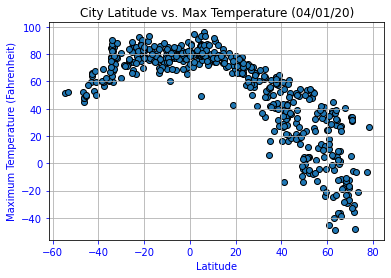

In [19]:
# Build a scatter plot for Latitude Vs. Temp.
plt.scatter(weather_dataframe_new["Lat"], weather_dataframe_new["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature (04/01/20)")
plt.ylabel("Maximum Temperature (Fahrenheit)",color="blue")
plt.xlabel("Latitude",color="blue")
plt.tick_params(color = "blue", labelcolor="blue")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WeatherPy/City_Latitude_vs_Max_Temperature.png", bbox_inches="tight")

# Show plot
plt.show()

At latitude 0 there is a peak in the temperatures and above or below 0 there is either a decrease or increase in temperature values.

## Latitude vs. Humidity Plot

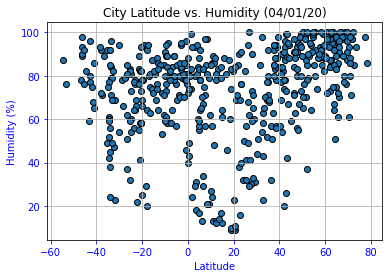

In [20]:
plt.scatter(weather_dataframe_new["Lat"], weather_dataframe_new["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (04/01/20)")
plt.ylabel("Humidity (%)",color="blue")
plt.xlabel("Latitude",color="blue")
plt.tick_params(color = "blue", labelcolor="blue")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WeatherPy/City_Latitude_vs_Humidity.png", bbox_inches="tight")

# Show plot
plt.show()

At a latitude of 0, the humidity percentage is high. The humidity percentage is high at both extremes for North and South, however there is no particular trend when there is an increase or decrease in the latitudes. 

## Latitude vs. Cloudiness Plot

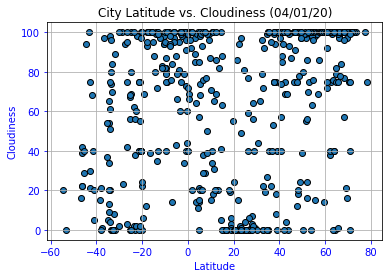

In [21]:
plt.scatter(weather_dataframe_new["Lat"], weather_dataframe_new["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (04/01/20)")
plt.ylabel("Cloudiness",color="blue")
plt.xlabel("Latitude",color="blue")
plt.tick_params(color = "blue", labelcolor="blue")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WeatherPy/City_Latitude_vs_Cloudiness.png", bbox_inches="tight")

# Show plot
plt.show()

There is no relationship between the Cloudiness and Latitudes.

## Latitude vs. Wind Speed Plot

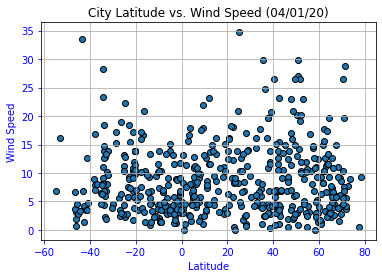

In [22]:
plt.scatter(weather_dataframe_new["Lat"], weather_dataframe_new["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (04/01/20)")
plt.ylabel("Wind Speed",color="blue")
plt.xlabel("Latitude",color="blue")
plt.tick_params(color = "blue", labelcolor="blue")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WeatherPy/City_Latitude_vs_Wind Speed.png", bbox_inches="tight")

# Show plot
plt.show()

There is no relationship between Wind speed and Latitudes.

## Linear Regression

In [23]:
# Create dataframe for Northern Hemisphere
north_hemisphere_weather = weather_dataframe_new[(weather_dataframe_new["Lat"] >= 0)]
north_hemisphere_weather




,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Khatanga,71.9667,102.5000,-48.35,100,100,3.60,RU,1673524691
5,Bilibino,68.0546,166.4372,-14.39,80,77,6.02,RU,1673524692
10,Butaritari,3.0707,172.7902,81.07,80,85,16.60,KI,1673524692
11,Albany,42.6001,-73.9662,33.51,78,69,3.00,US,1673524693
12,Sri Aman,1.2376,111.4621,80.65,83,92,0.00,MY,1673524693
...,...,...,...,...,...,...,...,...,...
495,Flin Flon,54.7682,-101.8650,-7.35,100,76,2.46,CA,1673524939
496,Cockburn Town,21.4612,-71.1419,76.39,71,86,18.32,TC,1673524939
497,Darhan,49.4867,105.9228,-13.86,93,100,2.86,MN,1673524939
498,Hoquiam,46.9809,-123.8893,49.98,91,100,13.80,US,1673524940


In [24]:
# Create dataframe for Southern Hemisphere

south_hemisphere_weather = weather_dataframe_new[(weather_dataframe_new["Lat"] < 0)]
south_hemisphere_weather



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bambous Virieux,-20.3428,57.7575,84.45,58,40,13.80,MU,1673524691
1,Tuatapere,-46.1333,167.6833,48.13,93,22,3.15,NZ,1673524691
3,Ushuaia,-54.8000,-68.3000,51.42,87,20,6.91,AR,1673524482
4,Punta Arenas,-53.1500,-70.9167,51.91,76,0,16.11,CL,1673524692
6,Salinópolis,-0.6136,-47.3561,80.60,81,60,11.81,BR,1673524692
...,...,...,...,...,...,...,...,...,...
473,Morondava,-20.2833,44.2833,85.19,66,100,10.58,MG,1673524926
480,Ambanja,-13.6833,48.4500,83.50,74,35,5.55,MG,1673524928
486,Mildura,-34.2000,142.1500,82.08,24,4,11.03,AU,1673524933
493,Chicama,-7.8447,-79.1469,69.06,78,98,4.90,PE,1673524938


In [32]:
# Calculate the linear regression

def linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos):

    slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    print(f"The r-squared value is: {rvalue**2}")
    
    correlation = st.pearsonr(x_values, y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.title(f"{hemisphere} Hemisphere ({pd.Timestamp.today().strftime('%d/%m/%Y')}) \n {y_label} vs. {x_label} Linear Regression",color="blue")
    plt.xlabel(f"{x_label}",color="blue")
    plt.ylabel(f"{y_label}",color="blue")
    plt.tick_params(color = "blue", labelcolor="blue")

    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(text_pos),fontsize=15,color="red")
    
    plt.savefig(f"output_data/WeatherPy/{hemisphere}_Hemisphere_{y_label}_vs_{x_label}_Linear_Regression_{str(pd.Timestamp.today().strftime('%d-%m-%Y'))}.png",dpi=300)

    plt.show()







####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.7314419455028772
The correlation between both factors is -0.86


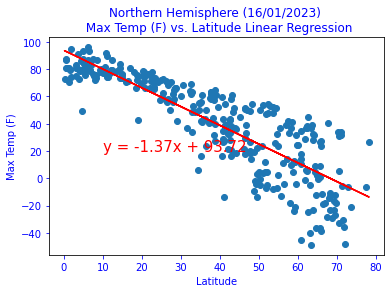

In [33]:
x_values = north_hemisphere_weather["Lat"]
y_values = north_hemisphere_weather["Max Temp"]
hemisphere = "Northern"
x_label = "Latitude"
y_label = "Max Temp (F)"
text_pos = (10,20)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.3110900169096057
The correlation between both factors is 0.56


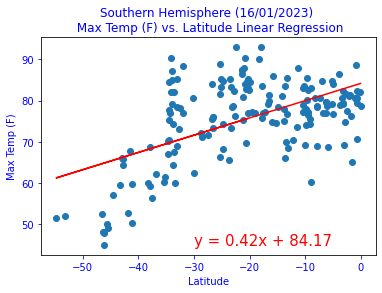

In [34]:
x_values = south_hemisphere_weather["Lat"]
y_values = south_hemisphere_weather["Max Temp"]
hemisphere = "Southern"
x_label = "Latitude"
y_label = "Max Temp (F)"
text_pos = (-30,45)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)

There is a strong negative correlation for the Northern Hemisphere and a positive correlation for the Southern Hemisphere in regards to Max Temperature and Latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.23082979782293234
The correlation between both factors is 0.48


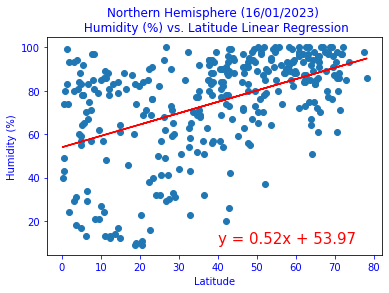

In [35]:
x_values = north_hemisphere_weather["Lat"]
y_values = north_hemisphere_weather["Humidity"]
hemisphere = "Northern"
x_label = "Latitude"
y_label = "Humidity (%)"
text_pos = (40,10)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.00984146795267804
The correlation between both factors is 0.1


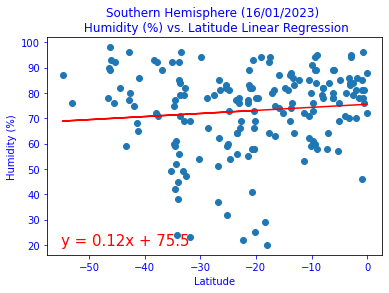

In [36]:
x_values = south_hemisphere_weather["Lat"]
y_values = south_hemisphere_weather["Humidity"]
hemisphere = "Southern"
x_label = "Latitude"
y_label = "Humidity (%)"
text_pos = (-55,20)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)

There is a slight correlation between Humidity and Latitude in both Northern and Southern hemispheres however it is a weak relationship.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.09895581232544669
The correlation between both factors is 0.31


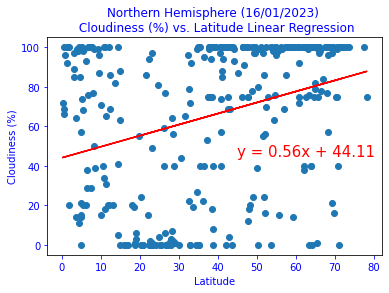

In [38]:
x_values = north_hemisphere_weather["Lat"]
y_values = north_hemisphere_weather["Cloudiness"]
hemisphere = "Northern"
x_label = "Latitude"
y_label = "Cloudiness (%)"
text_pos = (45,45)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.24913406087536677
The correlation between both factors is 0.5


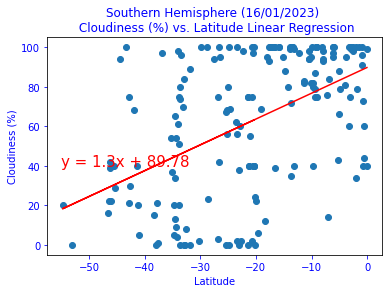

In [39]:
x_values = south_hemisphere_weather["Lat"]
y_values = south_hemisphere_weather["Cloudiness"]
hemisphere = "Southern"
x_label = "Latitude"
y_label = "Cloudiness (%)"
text_pos = (-55,40)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)

There is a weak correlation between Cloudiness and Latitude for the Northern and Southern hemispheres.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 2.2748269469198193e-05
The correlation between both factors is 0.0


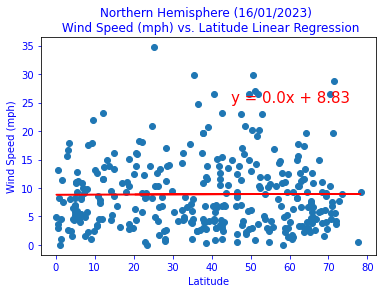

In [40]:
x_values = north_hemisphere_weather["Lat"]
y_values = north_hemisphere_weather["Wind Speed"]
hemisphere = "Northern"
x_label = "Latitude"
y_label = "Wind Speed (mph)"
text_pos = (45,25)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.03244586854941869
The correlation between both factors is -0.18


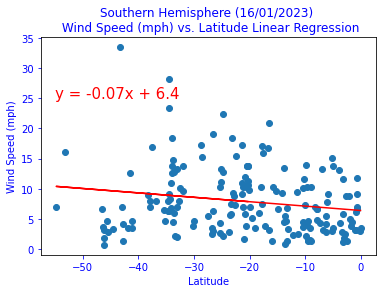

In [41]:
x_values = south_hemisphere_weather["Lat"]
y_values = south_hemisphere_weather["Wind Speed"]
hemisphere = "Southern"
x_label = "Latitude"
y_label = "Wind Speed (mph)"
text_pos = (-55,25)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)

There is a weak correlation between Wind speed and latitude for both Northern and Southern Hemispheres.

# Summary

1. At latitude 0, the maximum temperature is higher while moving away from latitude 0 sees a drop in temperature for both Northern and Southern hemispheres.

2. Humidity is higher at latitude 0 and at the highest and lowest latitudes. For the Northern and Southern hemispheres there is a weak relationship for Humidity and Latitude.

3. Wind speed does not increase above a certain value with a change in latitude. Therefore, there is no relationship between Wind speed and Latitude.

4. For Cloudiness and Latitude there is no relationship or trends.